# Explainable AI (xAI) Models

For Muscle Group Classification, two models had very high results: SVC and Random Tree Classifier. In order to know the models are not only making the right decisions but also making them for the right reasons, we use xAI models to evaluate it.

In [1]:
import pickle
import dice_ml
from dice_ml.utils import helpers  # Import helper functions
from mediapipe_handler import MediaPipeHandler

## Muscle Group Classification

In [2]:
import pandas as pd
import numpy as np

mediapipe_model = MediaPipeHandler()

#training_dataset=mediapipe_model.read_csv_to_pd("/Users/yasinetawfeek/Developer/DesD_AI_pathway/AI/data/train_new.csv")
#testing_dataset=mediapipe_model.read_csv_to_pd("/Users/yasinetawfeek/Developer/DesD_AI_pathway/AI/data/test_new.csv")

training_dataset=mediapipe_model.read_csv_to_pd(r"D:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\data\train_new.csv")
testing_dataset=mediapipe_model.read_csv_to_pd(r"D:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\data\test_new.csv")

"""
Removes original feature and splits it into x,y,z components

"""
def Preprocess_data(dataframe,columns_to_flatten):
    final_df=dataframe.copy()
    # Expanding each column into 3 separate columns (x, y, z) and appending it to the final dataframe.
    for column in columns_to_flatten:
        # print(np.vstack(dataframe[column]).astype(float))
        expanded_df=pd.DataFrame(np.vstack(dataframe[column]).astype(float), 
                           columns=[column+'_x', column+'_y', column+'_z'],
                           index=dataframe.index)
        new_df = pd.concat([dataframe.drop(column, axis=1), expanded_df], axis=1)
        for new_column in new_df.columns:
            final_df[new_column] = new_df[new_column]

    return final_df.drop(columns=columns_to_flatten,axis=1)

"""
Splits dataset into X_train,y_train or X_test,y_test, if you give it training dataset then X_train and y_train

"""
def Return_X_y(dataframe,columns_to_delete):
    X=dataframe.drop(columns=columns_to_delete)
    y=dataframe['muscle group']
    return X,y

features_to_split=['left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index',
       'left_thumb', 'right_thumb', 'left_hip', 'right_hip', 'left_knee',
       'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
       'left_foot_index', 'right_foot_index']

training_dataset_preprocessed=Preprocess_data(training_dataset,features_to_split)
X_train, y_train = Return_X_y(training_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])


testing_dataset_preprocessed=Preprocess_data(testing_dataset,features_to_split)
X_test, y_test = Return_X_y(testing_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])

columns_to_drop = ['left_heel_z', 'left_elbow_z', 'right_shoulder_y', 'right_elbow_x', 'right_pinky_z', 'left_ankle_x', 'right_hip_z', 'right_ankle_z', 'right_wrist_z', 'right_pinky_y', 'left_pinky_x', 'left_wrist_x', 'left_foot_index_z', 'right_foot_index_y', 'left_wrist_z', 'right_thumb_x', 'left_index_y', 'left_foot_index_y', 'right_hip_y', 'right_index_z', 'right_foot_index_x', 'left_knee_y', 'right_knee_y', 'right_knee_x', 'left_foot_index_x', 'left_thumb_x', 'right_foot_index_z', 'left_thumb_z', 'right_elbow_z', 'left_heel_x', 'left_ankle_y', 'left_pinky_y', 'left_pinky_z', 'right_thumb_y', 'right_heel_z', 'right_ankle_x', 'right_heel_y', 'right_index_y', 'left_ankle_z', 'left_elbow_x', 'right_index_x', 'right_wrist_y', 'right_elbow_y', 'right_heel_x', 'left_heel_y', 'right_hip_x', 'left_index_z', 'right_wrist_x', 'right_pinky_x', 'left_thumb_y', 'right_thumb_z', 'right_ankle_y', 'left_index_x']

X_train_feature_eng=X_train.drop(columns=columns_to_drop)
X_test_feature_eng=X_test.drop(columns=columns_to_drop)

current OS working directory is d:\stuff\uni bruv\Year 3\DESD2\DesD_AI_pathway\AI\app


In [3]:
joints = features_to_split
features = X_train_feature_eng.columns.tolist()

In [4]:
X_test_feature_eng

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z
0,0.721910,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,0.913307,-0.072432,0.613754,-0.101932,0.416997
1,0.708441,0.429699,-0.374545,0.528477,-0.010646,0.688422,0.502661,0.621732,0.872736,-0.074805,0.603179,0.055334,0.434193
2,0.514813,0.278268,-0.257773,0.504182,0.180725,0.406696,0.427920,0.507605,0.516309,-0.135340,0.489380,-0.173436,0.325247
3,0.497206,0.287982,-0.228493,0.467706,0.146498,0.342323,0.288521,0.502379,0.528920,-0.130180,0.480471,-0.191112,0.200679
4,0.562506,0.242112,0.022503,0.450366,0.052488,0.372436,0.345117,0.536908,0.489133,-0.001139,0.540632,-0.037636,-0.031916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,0.711527,0.370042,-0.112148,0.513904,-0.042675,0.611788,0.759030,0.704804,0.805723,0.021586,0.716539,0.197301,0.201268
10028,0.516811,0.151459,0.046125,0.504311,0.498981,0.240396,0.210850,0.530049,0.394564,-0.147045,0.490613,-0.226344,0.002455
10029,0.506868,0.153212,0.150971,0.525925,0.545939,0.229056,0.211537,0.526690,0.383766,-0.130776,0.504131,-0.220885,-0.082292
10030,0.306599,0.359066,0.205856,0.191600,-0.366252,0.440826,0.429798,0.263205,0.543378,0.183575,0.255391,0.239371,-0.213171


In [5]:
X_test

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,right_elbow_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.721910,0.420462,-0.296496,0.540267,0.389359,0.016451,0.688614,0.719355,-0.320937,0.476870,...,0.048062,0.545982,1.468452,0.808089,0.582782,1.568372,-0.140426,0.505466,1.502201,0.681453
1,0.708441,0.429699,-0.374545,0.528477,0.404475,-0.010646,0.678803,0.688422,-0.464527,0.464564,...,0.359975,0.505234,1.430602,0.893524,0.541847,1.485823,0.179419,0.468513,1.479771,0.738540
2,0.514813,0.278268,-0.257773,0.504182,0.270861,0.180725,0.488859,0.406696,-0.295514,0.503497,...,-0.198333,0.512081,0.680857,0.674289,0.459673,0.932194,-0.316279,0.489766,0.716105,0.700289
3,0.497206,0.287982,-0.228493,0.467706,0.295058,0.146498,0.467368,0.342323,-0.475617,0.438244,...,-0.217120,0.516265,0.845061,0.343015,0.460195,0.933378,-0.334771,0.466243,0.881037,0.279405
4,0.562506,0.242112,0.022503,0.450366,0.236417,0.052488,0.569636,0.372436,-0.085542,0.436324,...,0.229067,0.473472,0.879868,0.226225,0.548904,0.927730,0.039221,0.456958,0.929616,0.038315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,0.711527,0.370042,-0.112148,0.513904,0.440355,-0.042675,0.757283,0.611788,-0.014198,0.445851,...,0.645041,0.670391,1.393751,0.595427,0.715455,1.408927,0.513728,0.676198,1.440027,0.440085
10028,0.516811,0.151459,0.046125,0.504311,0.216705,0.498981,0.465216,0.240396,0.042300,0.485949,...,-0.415580,0.519960,0.906296,-0.163135,0.466573,0.958070,-0.498946,0.474309,0.917268,-0.240418
10029,0.506868,0.153212,0.150971,0.525925,0.214986,0.545939,0.469758,0.229056,0.064741,0.507451,...,-0.439418,0.519385,0.926014,-0.280487,0.459895,0.946027,-0.523089,0.442170,0.917267,-0.358668
10030,0.306599,0.359066,0.205856,0.191600,0.345344,-0.366252,0.289922,0.440826,0.055901,0.168860,...,0.420775,0.158088,0.919502,-0.029974,0.319542,0.908096,0.230649,0.241642,0.942041,-0.305432


In [6]:
with open('rcf_feature_eng_model.pkl', 'rb') as f:
    random_tree_model = pickle.load(f)

# with open('model.pkl', 'rb') as f:
#     svc_model = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'rcf_feature_eng_model.pkl'

In [ ]:
import shap
explainer = shap.Explainer(random_tree_model.predict, X_train_feature_eng)
shap_values = explainer(X_test_feature_eng[:20])

PermutationExplainer explainer: 21it [05:39, 16.96s/it]                        


In [ ]:
shap_values

.values =
array([[-8.58055556e-01, -2.11111111e-01,  4.19444444e-02,
         1.90833333e-01, -1.00000000e-02,  3.27777778e-01,
        -2.04166667e-01,  1.00000000e-01, -1.03250000e+00,
         1.55555556e-02, -4.66666667e-02, -1.72222222e-02,
         9.36111111e-02],
       [-8.63611111e-01, -3.74444444e-01,  2.45555556e-01,
         2.64444444e-01, -1.83333333e-02,  2.83611111e-01,
        -2.18055556e-01,  6.11111111e-03, -9.91666667e-01,
         2.13888889e-02, -1.13611111e-01,  3.00000000e-02,
         1.18611111e-01],
       [ 4.72222222e-02, -2.03611111e-01, -3.30555556e-02,
        -2.00833333e-01, -1.93611111e-01, -2.44166667e-01,
        -6.11666667e-01, -2.42777778e-01,  3.01944444e-01,
         6.22222222e-02, -1.27500000e-01, -1.62222222e-01,
        -1.94444444e-03],
       [ 1.01388889e-01, -5.75277778e-01, -2.29722222e-01,
         2.02777778e-02, -3.15277778e-01, -2.66388889e-01,
        -6.20555556e-01, -1.65555556e-01,  5.48611111e-01,
        -7.69444444e-02, -2

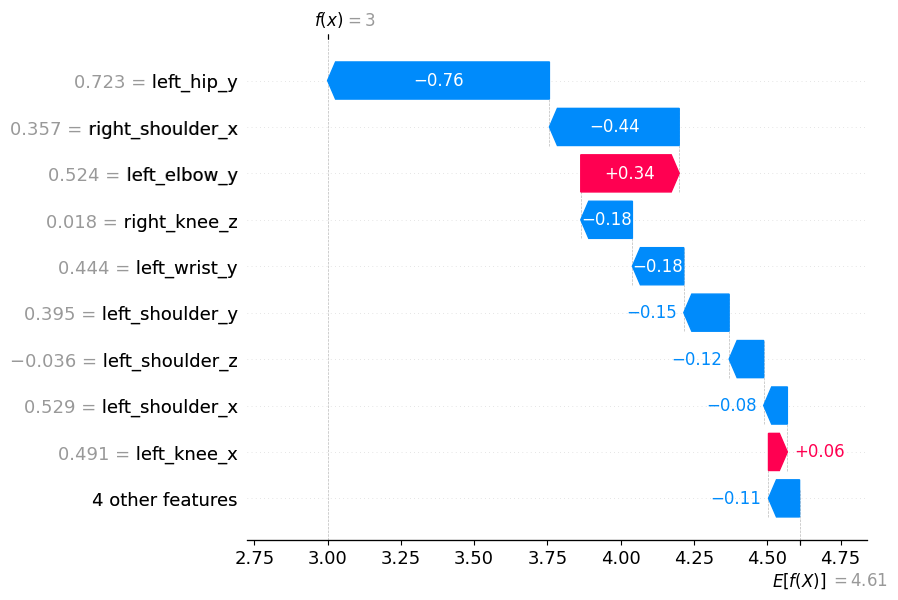

In [ ]:
shap.plots.waterfall(shap_values[19], max_display=10)

In [ ]:
data_dice = dice_ml.Data(dataframe=pd.concat([X_train_feature_eng, pd.Series(y_train, name="label")], axis=1),
                         continuous_features=features, outcome_name="label")

model_dice = dice_ml.Model(model=random_tree_model, backend="sklearn")
exp = dice_ml.Dice(data_dice, model_dice, method="random")


In [ ]:
y_test[0]

3

In [ ]:
query_instance = X_test_feature_eng.iloc[[0]]  # Note the double brackets to keep it as DataFrame

cf = exp.generate_counterfactuals(query_instance, total_CFs=1, desired_class=3)
cf.visualize_as_dataframe()

100%|██████████| 1/1 [00:03<00:00,  3.71s/it]

Query instance (original outcome : 3)


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z,label
0,0.72191,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,0.913307,-0.072432,0.613754,-0.101932,0.416997,3



Diverse Counterfactual set (new outcome: 4)


,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z,label
0,0.72191,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,-0.398606,0.162103,0.613754,-0.101932,0.416997,4


In [ ]:
X_test_feature_eng.iloc[[0]]

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_z
0,0.72191,0.420462,-0.296496,0.540267,0.016451,0.719355,0.534109,0.629631,0.913307,-0.072432,0.613754,-0.101932,0.416997


In [ ]:
original = query_instance
counterfactual = cf.cf_examples_list[0].final_cfs_df.iloc[0]

diffs = (counterfactual - original).abs()
important_joints = set()
for joint in joints:
    if any(diffs[f'{joint}_{axis}'] > 0.01 for axis in ['x', 'y', 'z']):
        important_joints.add(joint)

In [ ]:
import matplotlib.pyplot as plt

def plot_skeleton(joint_coords, highlighted_joints=set()):
    connections = [
        ('shoulder', 'elbow'), ('elbow', 'wrist'),
        ('hip', 'knee'), ('shoulder', 'hip')
    ]
    for j1, j2 in connections:
        x = [joint_coords[f'{j1}_x'], joint_coords[f'{j2}_x']]
        y = [joint_coords[f'{j1}_y'], joint_coords[f'{j2}_y']]
        plt.plot(x, y, 'k-', linewidth=2)

    for joint in joints:
        x = joint_coords[f'{joint}_x']
        y = joint_coords[f'{joint}_y']
        color = 'red' if joint in highlighted_joints else 'blue'
        plt.scatter(x, y, c=color, s=100)
        plt.text(x+0.01, y+0.01, joint, fontsize=9)

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title("Skeleton with Important Joints Highlighted")
    plt.show()

plot_skeleton(original.to_dict(), highlighted_joints=important_joints)

## Workout Classification